In [1]:
#Preliminaries
from wordcloud import WordCloud, STOPWORDS

#For Data Manipulation
import pandas as pd

#For cleaning the texts
import re

#For the Mask
from PIL import Image
import numpy as np

#Access the internet 
import urllib
import requests

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import panel as pn
import holoviews as hv
from collections import Counter

In [2]:
#pip install wordcloud

In [3]:
#Load the dataset
hotel_orig = pd.read_csv('tripadvisor_hotel_reviews .csv')

hotel = hotel_orig.copy()

In [4]:
print(f'The row and column sizes, respectively of the table are {hotel.shape}')
hotel.head()

The row and column sizes, respectively of the table are (20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#hotel.Review
#Shows the 'Review' column
hotel['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [6]:
#We need to concantinate all the strings under the review and then remove ',' and lower case it so function can work 
#Concantinates all data under the 'Review' column
text = hotel['Review'].str.cat(
    sep=', ').lower() #lower cases all text

In [7]:
# By default, NLTK (Natural Language Toolkit) includes a list of 40 stop words, including: “a”, “an”, “the”, “of”, “in”, etc. 
#This is how STOPWORDS stops words
stopwords = list(set(STOPWORDS))

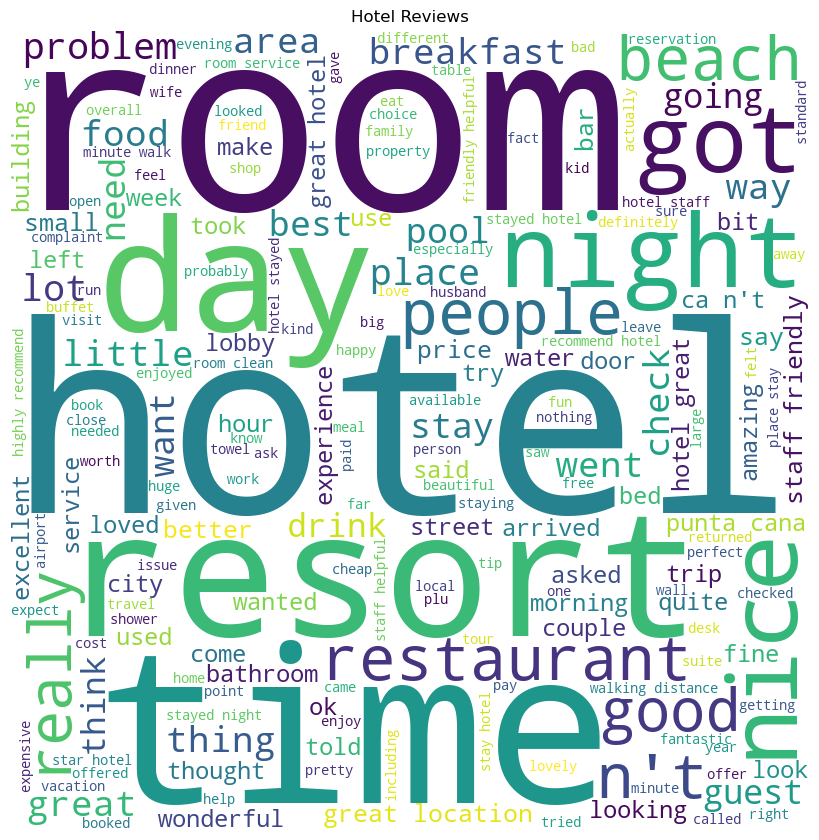

In [8]:
#Creates the word cloud 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords, #Adds the stopwords to use
                min_font_size = 10).generate(text) #Font Size 

#After generating the WordCloud object, enter this to a plotting function              
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Hotel Reviews")
  
plt.show()

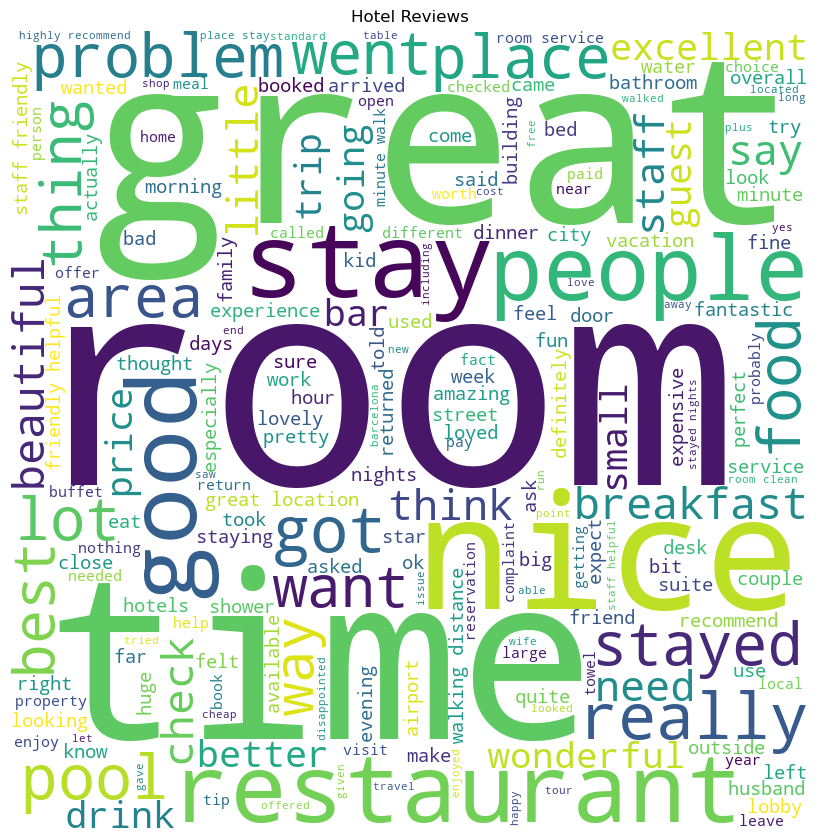

In [18]:
#Filter out frequent but uncessary words; based on context
stopwords = list(set(STOPWORDS)) + ["n't", "hotel", "beach", "resort","night","day","ca","r","http","www", "ye", "punta", "cana", "plu"]

wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
                 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Hotel Reviews")
  
plt.show()

**Analysis:** Generally, guests have found the place to be great. The word cloud revealed the word it to be a frequent one that most guest would review, mainly describing their stay. Guests also commented regarding the place's restaurant. Food, buffet, and service were mentioned frequently with a lot of words such as wonderful and staff to be seen as well. This may indicate that the experience with the restaurant and bar to be a good one. 

Despite the postive words left by the guests, it is to be taken note that most of the guest did not see the hotel to be recommened to others. Althought staff were mentioned to be friendly and helpful, some guests commented to have felt dissappointed, with others complaining about their stay. More guests have also stated to have "problem". Bedroom accessories, area of stay, and overall experience could be subjects of these incoviniences given their size in the word cloud to be close or larger with the mentioned words related to problems. Larger would mean more people have used it, and can be connected to other small words. 

The overall experience of guest may be due to small mistakes that the hotel overlooked. The negative experiences of guests were only a minimum given its size and may have been the unlucky ones to receive a bad room, or did not receive the expected outcomes. Despite this, the hotel should conduct a thourough maintinance on staff to guest communication as well as area maintiannce. Area maintenance should include random hotel room inspection with the restaurant and bar included. This should miminize negative experiences that guests may face. 

In [13]:
pn.extension()
hv.extension('bokeh')

def count_words(text):
    text = text.lower()
    words = [word.strip(',.;?!90{}') for word in text.split()]
    
    output_value = f'Total Word Count:',{sum(word_count.values())}
    
    bar_chart = hv.Bars(word_count.most_common(10)).opts(width=600, height=400, 
                                                         xlabel = 'Words', 
                                                         ylabel = 'Top 10 Common Words')
    plot.pane.object = bar_chart 
    
text_area = pn.widgets.TextAreaInput(name='Enter your Text: ', value='',)

count_button = pn.widgets.Button(name='Count Words', width=100)

count_button.on_click(lambda event: count_words(text_area.value()))

output = pn.widgets.StaticText(name='Result', value='Total Word Count: 0')

plot_pane = pn.pane.HoloViews(width=600, height=400)

app = pn.Row(text_area, count_button, output, plot_pane)

app

Row
    [0] TextAreaInput(name='Enter your Text: ')
    [1] Button(name='Count Words', width=100)
    [2] StaticText(name='Result', value='Total Word Count: 0')
    [3] HoloViews(None, height=400, sizing_mode='fixed', width=600)

In [15]:
# import panel as pn
# import holoviews as hv
# from collections import Counter


# def compute_most_frequent(text: str, n=10):
    
#     #TOKENIZATION
#     words = text.lower().split()
#     word_counts = Counter(words)
    
#     most_common = word_counts.most_common(n)
    
#     df = pd.DataFrame(most_common, columns = ['Word', 'Frequency'])
    
#     table = pn.widgets.DataFrame(df, name='Most Frequent Words')
    
#     return table

# def plot_frequent_words(n):
    
#     df = compute_most_frequent(text_sample, n)
#     return hv.Bars(df, 'Word', 'Frequency').opts(invert_axes=True, height=400, width=600)

# slider = pn. widgets.IntSlider(name='Number of Words', start=1, end=50, step=1, value=10)

# dmap = hv.DynamicMap(plot_frequent_words, kdims=['n']).redim.values(n=list(range(1,40)))

# pn.Row(slider, dmap).servable()

                                                

# # compute_most_frequent(text, 15)
    

<h1> Masking </h1>

In [48]:
img_src = 'https://www.freeiconspng.com/uploads/chicken-icon-16.jpg'

In [54]:
#Make sure youre getting the IMAGE SOURCE not the HREF
mask = np.array(Image.open(requests.get(img_src, stream=True).raw))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [50]:
mask.shape

(626, 502, 3)

In [56]:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    for y in range(len(mask[i])):
        transformed_mask[i][y] = list(map(transform_format, mask[i][y]))

ValueError: setting an array element with a sequence.

In [62]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

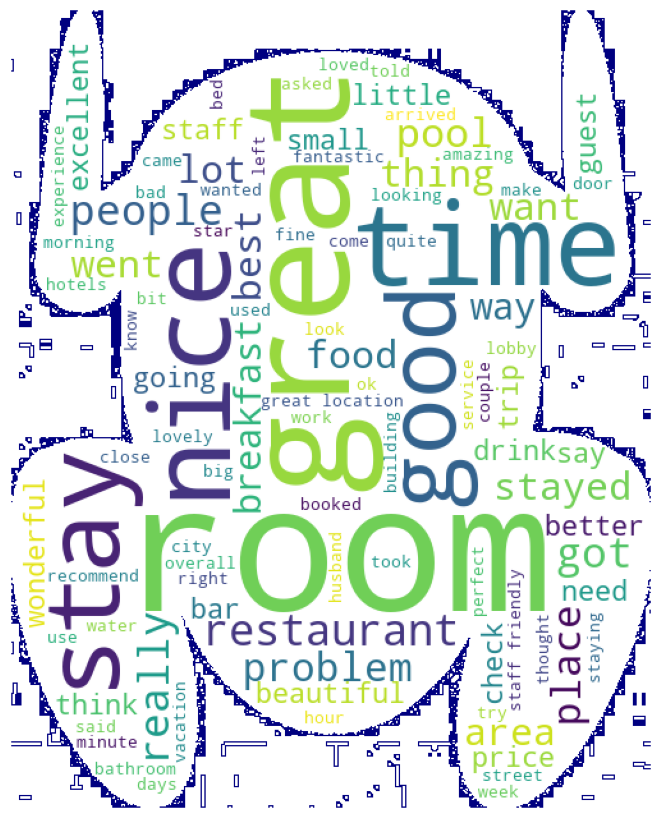

In [60]:
wordcloud = WordCloud(background_color ='white',
                mask= mask,   
                stopwords = stopwords,
                min_font_size = 10,
                width=mask.shape[1],
                height=mask.shape[0],
                contour_width=1, 
                contour_color='#000080').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [63]:
imgsrc = 'https://www.freeiconspng.com/uploads/black-instagram-icon-21.png'

In [64]:
#Fills in 0 portion = whcih 
mask = np.array(Image.open(requests.get(imgsrc, stream=True).raw))
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

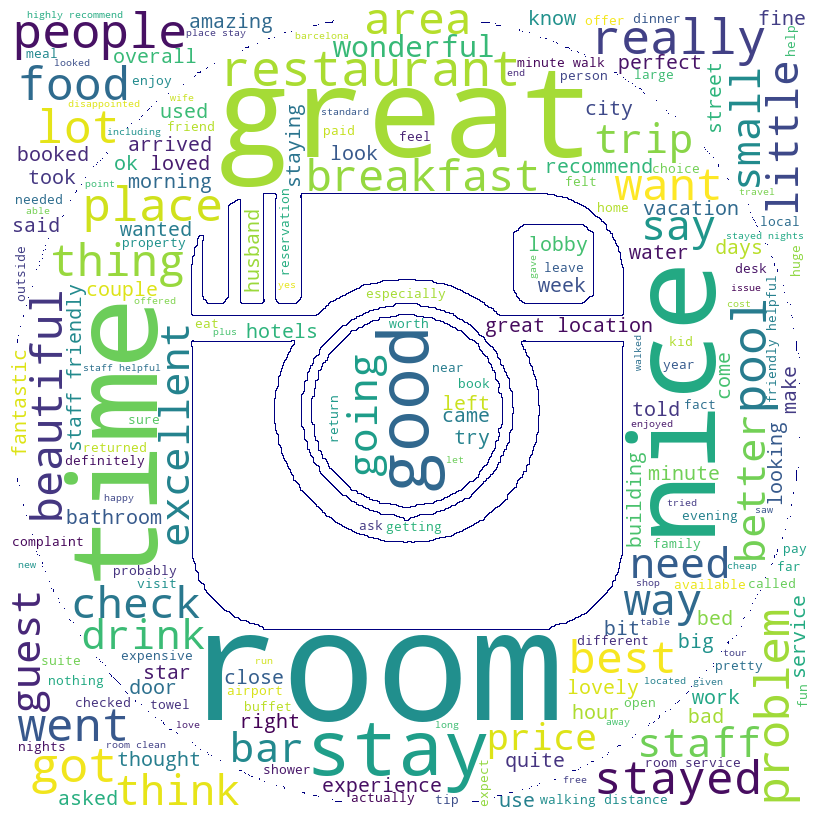

In [65]:
wordcloud = WordCloud(background_color ='white',
                mask= mask,   
                stopwords = stopwords,
                min_font_size = 10,
                width=mask.shape[1],
                height=mask.shape[0],
                contour_width=1, 
                contour_color='#000080').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [67]:
img_src2 = 'https://www.freeiconspng.com/uploads/clip-art-star-png--clipart-best-5.png'

In [68]:
mask2 = np.array(Image.open(requests.get(img_src2, stream=True).raw))
mask2

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)